<a href="https://colab.research.google.com/github/aidot-kr/AISecurity/blob/master/5_Word2Vec_FastText.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Word2Vec

- Gensim 패키지를 사용한 Word2Vec
- 참고URL: https://www.kaggle.com/pierremegret/gensim-word2vec-tutorial

1) 학습에 필요한 코퍼스 수집

In [6]:
!pip3 install wikipedia-api

  Created wheel for wikipedia-api: filename=Wikipedia_API-0.5.4-cp36-none-any.whl size=13462 sha256=276fa8f205383148f86fa0fb91f778d15f22f0922202cd4d5a239d6e980d73d6
  Stored in directory: /root/.cache/pip/wheels/bf/40/42/ba1d497f3712281b659dd65b566fc868035c859239571a725a
Successfully built wikipedia-api


In [8]:
!pip3 install konlpy

     |████████████████████████████████| 19.4MB 23.8MB/s 
     |████████████████████████████████| 3.8MB 45.5MB/s 
     |████████████████████████████████| 92kB 8.1MB/s 
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [38]:
# 설치된 라이브리 호출
import wikipediaapi
import urllib.request
from konlpy.tag import Okt
from gensim.models.word2vec import Word2Vec
import pandas as pd
import matplotlib.pyplot as plt


# 페이지 요약 정보를 수집
wiki_txt=wikipediaapi.Wikipedia('ko')
search_nm = '경영'

# 해당 페이지가 존재하는지 확인
page_py = wiki_txt.page(search_nm) 
print("Page - Exists: %s" % page_py.exists())

# 페이지의 내용 전체를 수집
wiki = wikipediaapi.Wikipedia( language='ko', extract_format=wikipediaapi.ExtractFormat.WIKI) 
p_wiki = wiki.page(search_nm) 
print(p_wiki.text)

Page - Exists: True
경영(經營, 영어: management)이란 '조직의 관한 의사결정을 행하는 행동'을 말한다.경영이라는 말은 대한민국의 학계나 실업계에서 그 개념이 극히 모호하게 또 추상적으로 사용되고 있다. 경영한다는 것은 어느 경제단위를 그 설립목적에 부합하도록 의식적으로 계획·유도하고 지휘하는 것을 말한다. 예를 들면 학교·병원·고아원 등과 같은 비영리적 경제단위나 영리적 경제단위인 주식회사를 경영한다는 것은 이들 경영체의 설립목적에 부응하도록 계획하고 낭비없이 밀고간다는 것을 말한다. 또한 기업이라는 말도 역시 구분되어 있지 않은데, 기업이란 위험성을 인식하고도 그 위험성을 극복, 더욱 큰 이윤을 추구하고자 하는 그 경제단위의 설립목적을 달성하려고 시도하는 것을 말한다. 이렇게 볼 때 모든 경제단위(비영리적 경제단위와 영리를 목적으로 하는 경제단위)는 경영체이며, 특히 영리를 목적으로 경영하는 경제단위를 기업체라고 부른다. 물론 기업체를 경영한다는 것은 기업체의 목적달성이 성취되도록 시도한다는 것을 뜻한다.

의미
경영이란 개념의 변화
경영이란 말은 오래전부터 있었으나 여기서 사용하는 의미는 새로운 개념이다.

여기서 첫 번째 뜻은 고전적인 용어로, 앞으로 말할 경영과는 관계가 없다. 두 번째 뜻은 경영에 대한 동태적(動態的)·형태적(形態的)인 이해이다. 이 둘은 구체적으로는 관계가 있지만 그 지향하는 바는 서로 다르다.
경영의 본래 의미는 조직을 관리하고 운영하는 것이다. 이를 조직의 목적과 연관시켜 '조직의 목적을 달성하기 위한 일체의 과정'이라고도 할 수 있다. 앞의 쓰인 조직은 가계, 기업, 기관 또는 다른 어떤 조직도 될 수도 있다. 하지만, 현대사회에 접어들면서 기업의 역할과 비중이 점차 커지게 되어 오늘날에는 주로 기업 경영(corporate management)을 의미하게 되었다.

영어에서 말하는 경영
경영이란 단어를 영어로 바꾸면 Business management, Business라고 하거나 management라고

2) 데이터 전처리
- 문장 추출, 불용어 제거

In [39]:
import nltk #자연어 처리 패키지
from nltk.corpus import stopwords #NLTK에서 제공되는 불용어 사전
import string # Python  문자열 처리 클래스
import pandas as pd # 데이터분석 라이브러리
import re
from nltk.tokenize import word_tokenize, sent_tokenize

stopwords_kor = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

def process_text(text):
    #1 문자 구분자 제거
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    #2 영어 불용어 제거
    clean_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    
    #3 한글 불용어 제거
    clean_words = [word for word in clean_words if not word in stopwords_kor] # 불용어 제거
    
    #3 리스트 반환
    return clean_words

In [40]:
# 전체 문장 전처리 및 문단 기준 분리
from textblob import TextBlob

import nltk
nltk.download('punkt')
nltk.download('stopwords')

from konlpy.tag import Okt
okt = Okt()

tokenized_data = []
text = p_wiki.text

blob = TextBlob(text) # TextBolob 객체 생성

#토큰화(문장기준) 처리
for sentence in blob.sentences: 
    temp = " ".join(process_text(sentence))
    
    temp = okt.nouns(temp)
    temp = [word for word in temp if len(word) > 1]
    print(temp)

    tokenized_data.append(temp)
    

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['경영', '영어', '이란', '조직', '의사결정', '행동', '경영', '대한민국', '학계', '실업계', '개념', '극히', '추상', '사용']
['단위', '설립', '목적', '부합', '의식', '계획', '유도', '지휘']
['학교', '병원', '고아원', '비영리', '단위', '영리', '단위', '주식회사', '설립', '목적', '부응', '계획', '낭비', '밀고', '간다']
['또한', '기업', '역시', '구분', '기업', '위험성', '인식', '위험성', '극복', '더욱', '이윤', '추구', '단위', '설립', '목적', '달성', '시도']
['모든', '단위', '비영리', '단위', '영리', '목적', '단위', '영리', '목적', '경영', '단위', '기업체']
['기업체', '기업체', '목적', '달성', '성취', '시도']
['의미', '경영', '개념', '변화', '경영', '부터', '여기', '사용', '의미', '개념']
['여기', '전적', '용어', '경영', '관계']
['경영', '대한', '동태', '형태', '이해']
['구체', '관계', '지향', '서로']
['경영', '본래', '의미', '조직', '관리', '운영']
['조직', '목적', '연관', '조직', '목적', '달성', '일체', '과정']
['조직', '가계', '기업', '기관', '다른', '조직', '수도']
['사회', '기업', '역할', '비중', '점차', '오늘날', '주

3) Word2Vec 모델생성 및 주요파라미터
- min_count : 최소단어의 빈도
- window: 현재 단어와 예측 단어 사이의 최대 거리
- size: 피처 벡터의 차원
- negative: 0 이상인 경우 네거티브 샘플링이 사용됨
- workers: 작업자의 스레드 갯수

In [41]:
from gensim.models import Word2Vec
model = Word2Vec(sentences = tokenized_data, size = 200, window = 5, negative = 2, min_count = 1, workers = 4, sg = 1)

# 완성된 임베딩 매트릭스의 크기 확인
model.wv.vectors.shape

(1351, 200)

4) 모델 사용

In [48]:
print(model.wv.most_similar("경영"))

[('노동조합', 0.27502328157424927), ('동시', 0.2347884178161621), ('실시', 0.2333192527294159), ('존재', 0.21847590804100037), ('이유', 0.19878831505775452), ('구별', 0.19684478640556335), ('반드시', 0.1929129958152771), ('명제', 0.19216594099998474), ('조성', 0.19034233689308167), ('제로', 0.1884884238243103)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


## FastText

In [49]:
from gensim.models import FastText
ft_model = FastText(tokenized_data, size=200, window=5, negative = 2,min_count=1, workers=4, sg=1)

In [50]:
print(ft_model.wv.most_similar("경영"))

[('구성', 0.281310111284256), ('조직', 0.28122371435165405), ('전제', 0.2806837558746338), ('기업', 0.2801007330417633), ('활동', 0.27784982323646545), ('지배', 0.2744905352592468), ('장경영', 0.2744487524032593), ('원칙', 0.2694956064224243), ('현상', 0.26727351546287537), ('수익', 0.2611526846885681)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


### word2vec 시각화

In [51]:
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
import gensim 
import gensim.models as g

%config InlineBackend.figure_format = 'retina'

!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.


In [52]:
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

#model_name = '300features_40minwords_10text'
#model = g.Doc2Vec.load(model_name)

vocab = list(model.wv.vocab)
X = model[vocab]

print(len(X))
print(X[0][:10])
tsne = TSNE(n_components=2)

# 100개의 단어에 대해서만 시각화
X_tsne = tsne.fit_transform(X[:100,:])
# X_tsne = tsne.fit_transform(X)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


1351
[-0.00153428 -0.00046906  0.00193938  0.00147687  0.00062915 -0.00208281
  0.00049145  0.00114912  0.00103681 -0.00074762]


In [53]:
df = pd.DataFrame(X_tsne, index=vocab[:100], columns=['x', 'y'])
df.shape

df.head(10)

,x,y
경영,2.889982,-0.136774
영어,1.598723,-1.238566
이란,2.303951,-1.800841
조직,-1.096025,-4.156012
의사결정,-0.240987,-3.541104
행동,0.909127,0.893909
대한민국,-0.399250,-2.336504
학계,-0.115016,0.293449
실업계,-0.428147,-1.005178
개념,1.761999,-1.020357


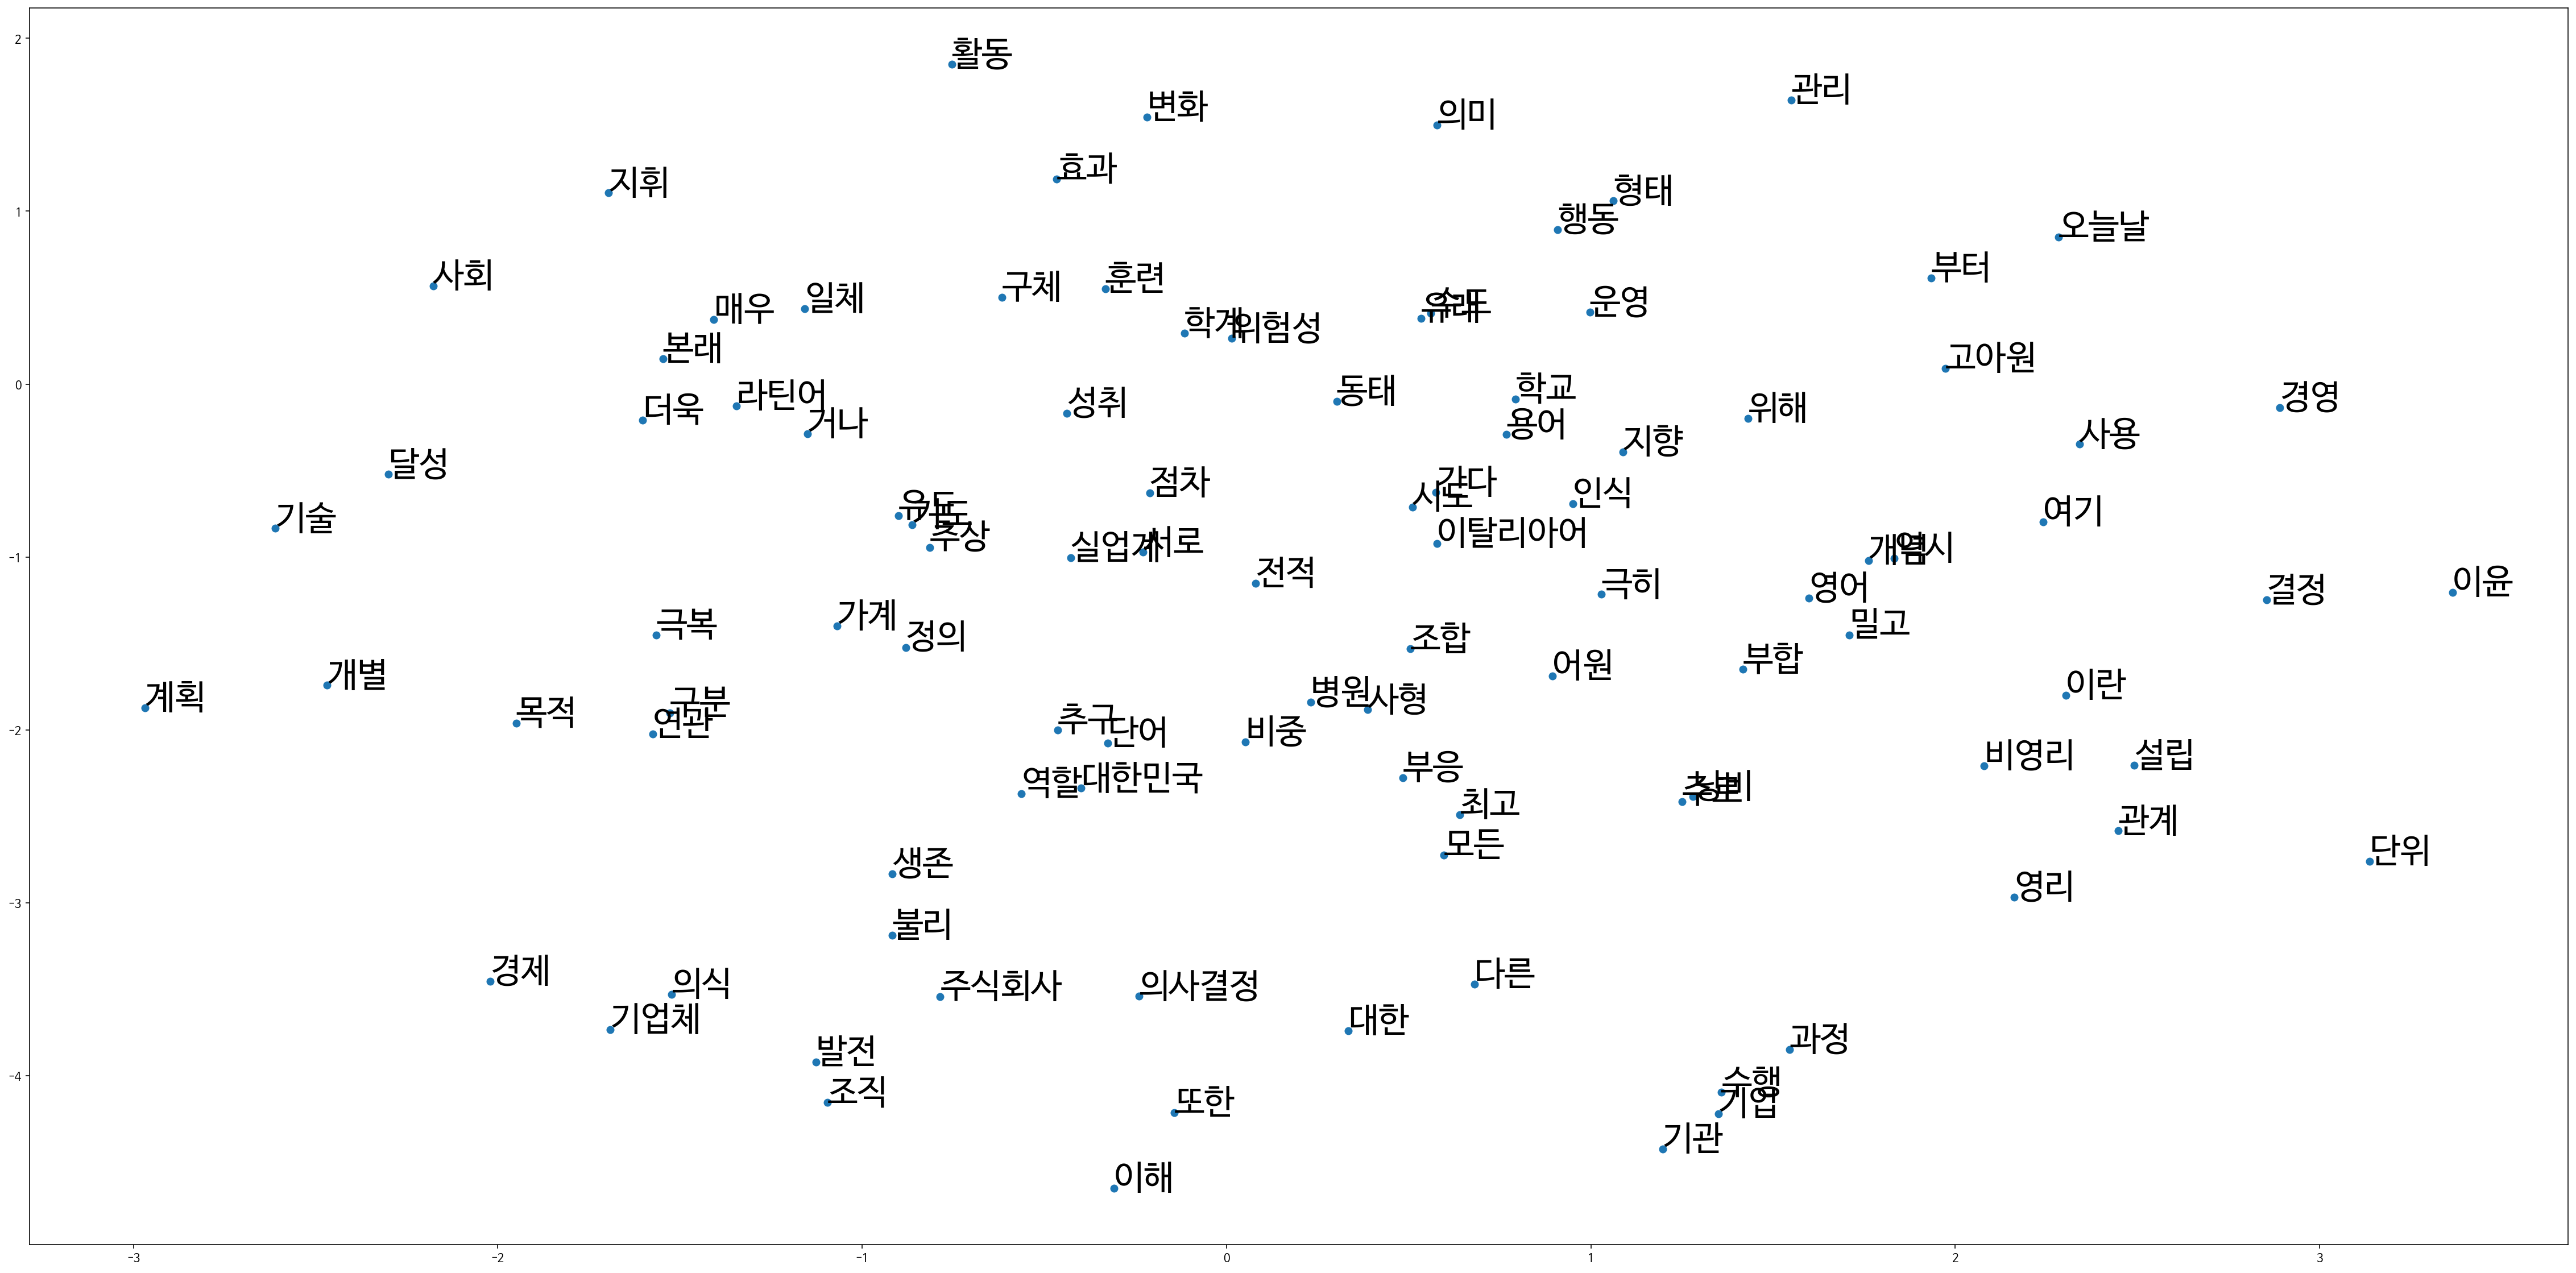

In [54]:
fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=30)
plt.show()